[*********************100%***********************]  1 of 1 completed


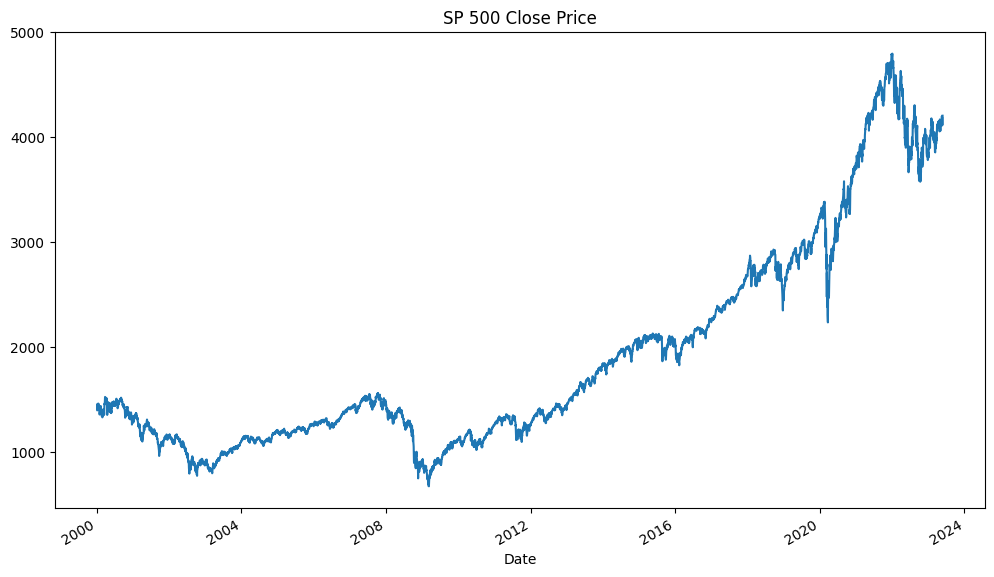

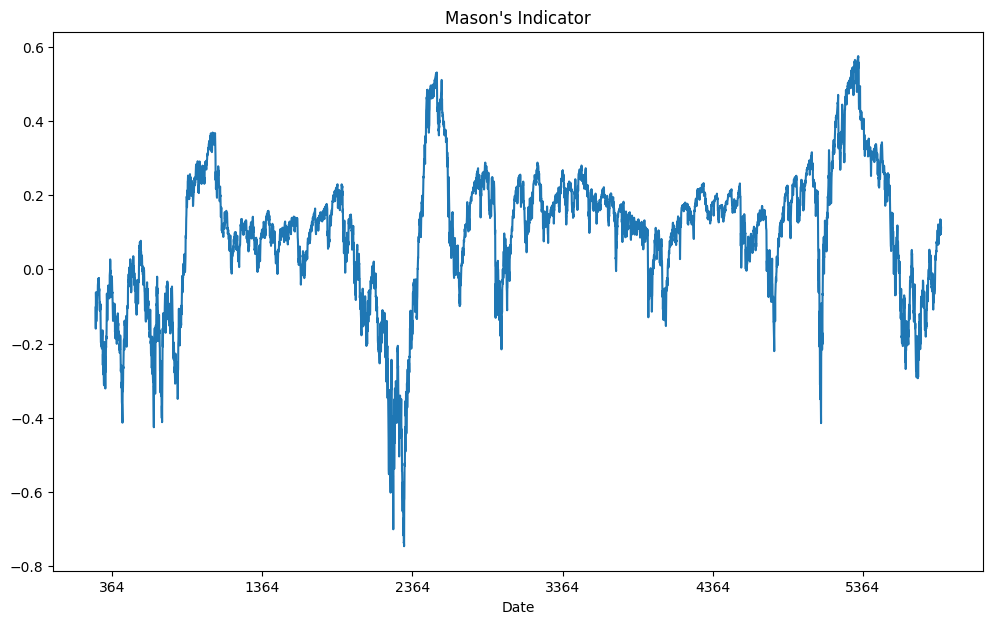

In [3]:
# Step 1: Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Download SPY data
spy_data = yf.download('^GSPC', start='2000-01-01', end='2023-05-29')

# Step 3: Plot Close price data
spy_data['Close'].plot(title='SP 500 Close Price', figsize=(12, 7))
plt.show()

# Step 4: Create Mason's indicator
def calculate_masons(data, win=252):
    data['masons'] = np.nan
    for k in range(win, len(data)):
        PX = data.iloc[k-win:k]['Close'].values
        Min = np.inf
        Max = 0
        utility = 0
        for i in range(win):
            Min = min(Min, np.min(PX[i:]))
            Max = max(Max, np.max(PX[i:]))
            utility += np.log(PX[-1] / Max) + np.log(PX[-1] / Min)
        data.at[k, 'masons'] = utility / win
    return data

# Step 5: Apply Mason's indicator to SPY data
spy_data = calculate_masons(spy_data)

# Step 6: Plot Mason's indicator
spy_data['masons'].plot(title="Mason's Indicator", figsize=(12, 7))
plt.show()

[*********************100%***********************]  1 of 1 completed


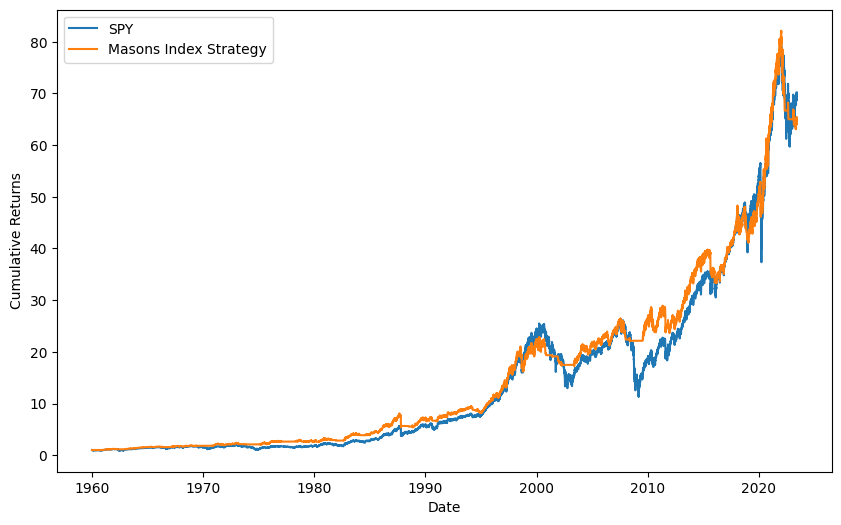

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import empyrical as ep


# Download historical data for the ETFs
data = yf.download('^GSPC', start='1960-01-01', end='2023-05-29')['Close']

def masons_index(prices, window=250):
    n = len(prices)
    masons_index = np.zeros(n)
    
    for k in range(window, n):
        utility = 0
        PX = prices[k-window:k]
        Min = np.inf
        Max = 0
        for i in range(window):
            Min = min(Min, np.min(PX[i:]))
            Max = max(Max, np.max(PX[i:]))
            utility += np.log(PX[-1] / Max) + np.log(PX[-1] / Min)
        
        masons_index[k] = utility / window

    return masons_index

# Calculate the Masons Index for the downloaded data
data_masons_index = masons_index(data)

# Calculate the daily returns of the SPY ETF
data_returns = data.pct_change()

# Create a signal based on the Masons Index being positive or negative
masons_signal = pd.Series(data_masons_index > 0, index=data.index)

masons_signal.iloc[:250] = 0  # Set the signal to 0 for the first 250 days

# Apply the strategy by multiplying the daily returns by the Masons signal (shifted by 1 day to avoid lookahead bias)
strategy_returns = data_returns * masons_signal.shift(1)

# Calculate the cumulative returns of the strategy
cumulative_strategy_returns = (1 + strategy_returns).cumprod()

# Plot the SPY ETF's cumulative returns and the strategy's cumulative returns
fig, ax = plt.subplots(figsize=(10, 6))

data_cumulative_returns = (1 + data_returns).cumprod()
ax.plot(data_cumulative_returns.index, data_cumulative_returns, label='SPY')
ax.plot(cumulative_strategy_returns.index, cumulative_strategy_returns, label="Masons Index Strategy")
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')

plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


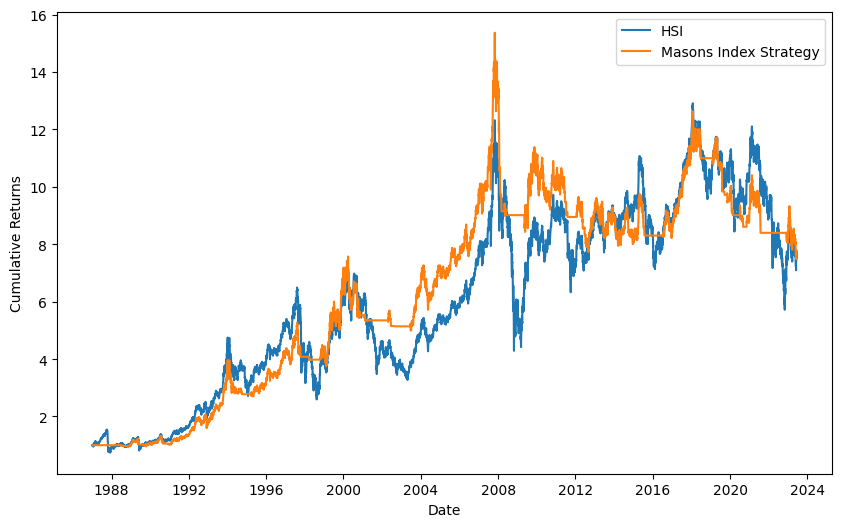

In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import empyrical as ep


# Download historical data for the ETFs
data = yf.download('^HSI', start='1960-01-01', end='2023-06-16')['Close']

def masons_index(prices, window=252):
    n = len(prices)
    masons_index = np.zeros(n)
    
    for k in range(window, n):
        utility = 0
        PX = prices[k-window:k]
        Min = np.inf
        Max = 0
        for i in range(window):
            Min = min(Min, np.min(PX[i:]))
            Max = max(Max, np.max(PX[i:]))
            utility += np.log(PX[-1] / Max) + np.log(PX[-1] / Min)
        
        masons_index[k] = utility / window

    return masons_index

# Calculate the Masons Index for the downloaded data
data_masons_index = masons_index(data)

# Calculate the daily returns of the SPY ETF
data_returns = data.pct_change()

# Create a signal based on the Masons Index being positive or negative
masons_signal = pd.Series(data_masons_index > 0, index=data.index)

masons_signal.iloc[:252] = 0  # Set the signal to 0 for the first 252 days

# Apply the strategy by multiplying the daily returns by the Masons signal (shifted by 1 day to avoid lookahead bias)
strategy_returns = data_returns * masons_signal.shift(1)

# Calculate the cumulative returns of the strategy
cumulative_strategy_returns = (1 + strategy_returns).cumprod()

# Plot the SPY ETF's cumulative returns and the strategy's cumulative returns
fig, ax = plt.subplots(figsize=(10, 6))

data_cumulative_returns = (1 + data_returns).cumprod()
ax.plot(data_cumulative_returns.index, data_cumulative_returns, label='HSI')
ax.plot(cumulative_strategy_returns.index, cumulative_strategy_returns, label="Masons Index Strategy")
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')

plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


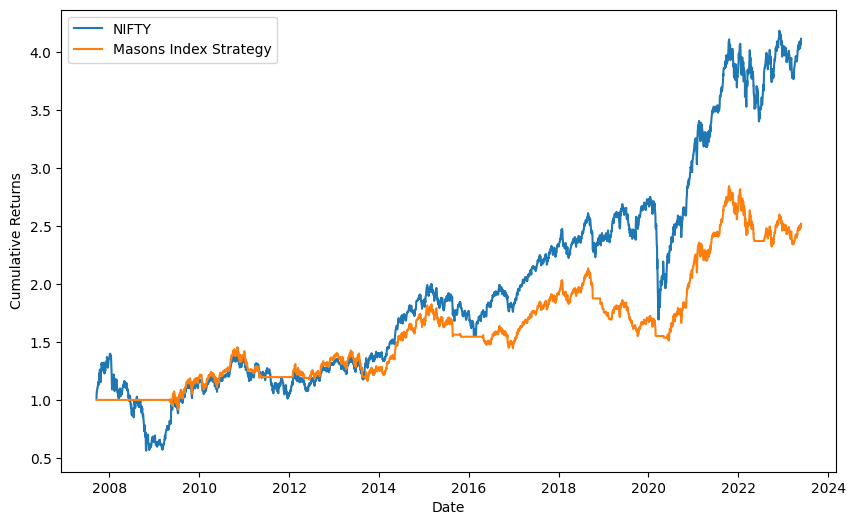

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import empyrical as ep


# Download historical data for the ETFs
data = yf.download('^NSEI', start='1960-01-01', end='2023-06-16')['Close']

def masons_index(prices, window=252):
    n = len(prices)
    masons_index = np.zeros(n)
    
    for k in range(window, n):
        utility = 0
        PX = prices[k-window:k]
        Min = np.inf
        Max = 0
        for i in range(window):
            Min = min(Min, np.min(PX[i:]))
            Max = max(Max, np.max(PX[i:]))
            utility += np.log(PX[-1] / Max) + np.log(PX[-1] / Min)
        
        masons_index[k] = utility / window

    return masons_index

# Calculate the Masons Index for the downloaded data
data_masons_index = masons_index(data)

# Calculate the daily returns of the SPY ETF
data_returns = data.pct_change()

# Create a signal based on the Masons Index being positive or negative
masons_signal = pd.Series(data_masons_index > 0, index=data.index)

masons_signal.iloc[:252] = 0  # Set the signal to 0 for the first 252 days

# Apply the strategy by multiplying the daily returns by the Masons signal (shifted by 1 day to avoid lookahead bias)
strategy_returns = data_returns * masons_signal.shift(1)

# Calculate the cumulative returns of the strategy
cumulative_strategy_returns = (1 + strategy_returns).cumprod()

# Plot the SPY ETF's cumulative returns and the strategy's cumulative returns
fig, ax = plt.subplots(figsize=(10, 6))

data_cumulative_returns = (1 + data_returns).cumprod()
ax.plot(data_cumulative_returns.index, data_cumulative_returns, label='NIFTY')
ax.plot(cumulative_strategy_returns.index, cumulative_strategy_returns, label="Masons Index Strategy")
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')

plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


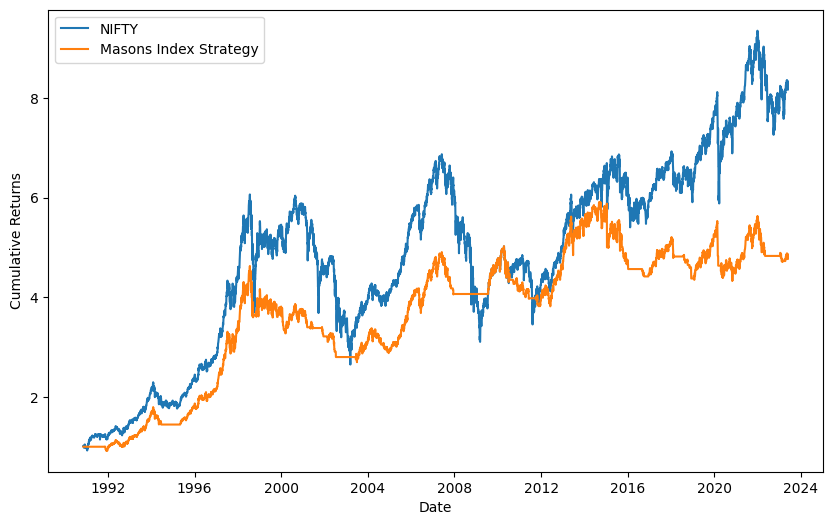

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import empyrical as ep


# Download historical data for the ETFs
data = yf.download('^SSMI', start='1990-01-01', end='2023-05-29')['Close']

def masons_index(prices, window=252):
    n = len(prices)
    masons_index = np.zeros(n)
    
    for k in range(window, n):
        utility = 0
        PX = prices[k-window:k]
        Min = np.inf
        Max = 0
        for i in range(window):
            Min = min(Min, np.min(PX[i:]))
            Max = max(Max, np.max(PX[i:]))
            utility += np.log(PX[-1] / Max) + np.log(PX[-1] / Min)
        
        masons_index[k] = utility / window

    return masons_index

# Calculate the Masons Index for the downloaded data
data_masons_index = masons_index(data)

# Calculate the daily returns of the SPY ETF
data_returns = data.pct_change()

# Create a signal based on the Masons Index being positive or negative
masons_signal = pd.Series(data_masons_index > 0, index=data.index)

masons_signal.iloc[:252] = 0  # Set the signal to 0 for the first 252 days

# Apply the strategy by multiplying the daily returns by the Masons signal (shifted by 1 day to avoid lookahead bias)
strategy_returns = data_returns * masons_signal.shift(1)

# Calculate the cumulative returns of the strategy
cumulative_strategy_returns = (1 + strategy_returns).cumprod()

# Plot the SPY ETF's cumulative returns and the strategy's cumulative returns
fig, ax = plt.subplots(figsize=(10, 6))

data_cumulative_returns = (1 + data_returns).cumprod()
ax.plot(data_cumulative_returns.index, data_cumulative_returns, label='NIFTY')
ax.plot(cumulative_strategy_returns.index, cumulative_strategy_returns, label="Masons Index Strategy")
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')

plt.legend()
plt.show()
